# Gráficos de tercer orden alfa beta

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def solu(r2, b, alpha, mu):

    sqrt = np.sqrt

    E=-7 + 144*b
    B = 49 + 54*b*(-21 + sqrt(21)*sqrt(E))
    D1 = -7*sqrt(21) + 162*b*(sqrt(21) - sqrt(-7 + 144*b))
    D2 = -7*7**(1/3) + 108*7**(1/3)*b + B**(2/3)

    term1 = (
        -(46656/7)*b**3*(-7 + 162*b)*r2**6*alpha**6
        + (629856*b**3*sqrt(E)*B**(4/3)*r2**2*alpha**5*mu)
        /(7**(1/3)*D1*D2)
    )

    term2 = (69984/7)*b**3*r2**2*alpha**(9/2)*sqrt(
        (3888/7)*b**2*(E)*r2**8*alpha**3
        + (
            12*7**(2/3)*sqrt(E)*(-7 + 162*b)*B**(4/3)
            *r2**4*alpha**2*mu
        )/( (-D1)*D2 )
        + (
            567*7**(1/3)*(E)*B**(8/3)*alpha*mu**2
        )/( (-D1)**2 * D2**2 )
    )

    big_term = (term1 + term2)**(1/3)

    result = (
        1
        + r2**2
        + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)
        + (1/(36*b*alpha**2))*big_term
    )

    return result

C:\Users\Danito\AppData\Local\Temp\ipykernel_17440\2261536379.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"
C:\Users\Danito\AppData\Local\Temp\ipykernel_17440\4135843313.py:31: RuntimeWarning: invalid value encountered in power
  big_term = (term1 + term2)**(1/3)
C:\Users\Danito\AppData\Local\Temp\ipykernel_17440\4135843313.py:36: RuntimeWarning: invalid value encountered in divide
  + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)
C:\Users\Danito\AppData\Local\Temp\ipykernel_17440\4135843313.py:36: RuntimeWarning: divide by zero encountered in divide
  + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)


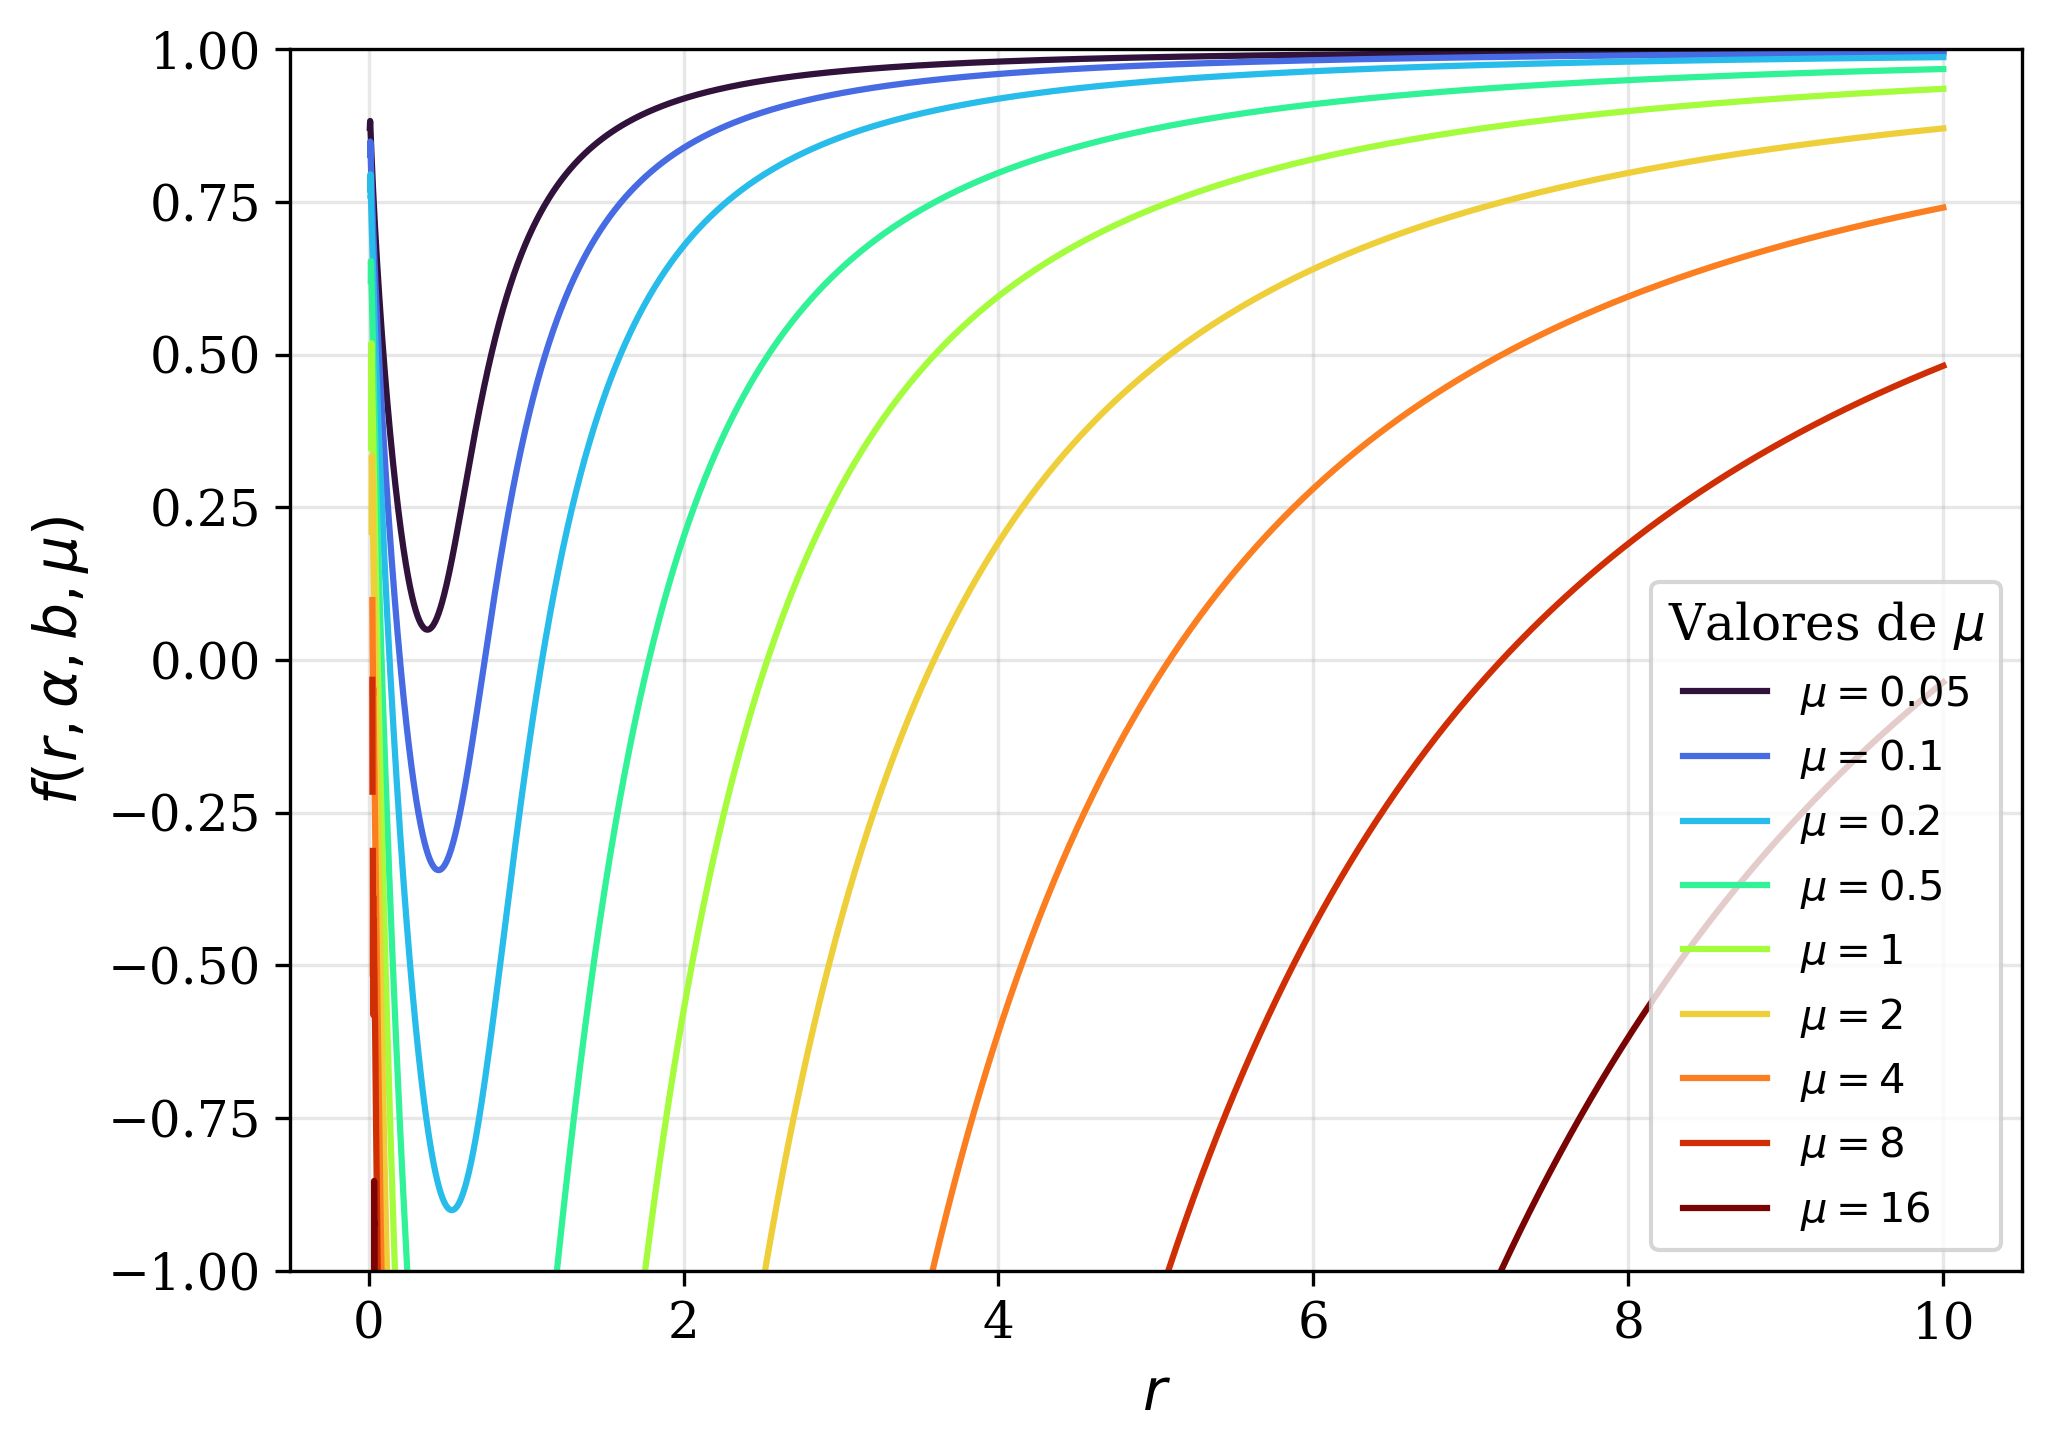

In [8]:
r_vals = np.linspace(0, 10, 10000)
mu_list = [0.05, 0.1, 0.2, 0.5, 1, 2, 4, 8,16]
b_list = [0.07, 0.1, 0.2, 0.5, 1, 2, 4, 8,16]

#mu_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,0.08,0.09,0.1]

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "figure.dpi": 300,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 10,
    "lines.linewidth": 1.5
})

# Colormap profesional tipo arcoiris
cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"

# Graficar
plt.figure(figsize=(7,5))

for i, mu in enumerate(mu_list):
    color = cmap(i / (len(mu_list) - 1))
    plt.plot(r_vals, solu(r_vals,1,0.03, mu), color=color, label=f"$\\mu = {mu}$")

plt.xlabel("$r$")
plt.ylabel("$f(r,\\alpha,b,\\mu)$")
#plt.title("$f(r,\\alpha,b,\\mu)$ para varios valores de $\\mu$")
plt.grid(True, alpha=0.3)
plt.ylim(-1, 1)
plt.legend(title="Valores de $\\mu$", frameon=True)
plt.tight_layout()

plt.savefig("grafico_f alfabeta variando mu2 zoom.png", dpi=300, bbox_inches="tight")
plt.show()

# EXTREMAL BLACK HOLE

In [3]:
#alfa=0.03 , b=1

def f(r, mu):
    A = -0.000753128*(r**6) - 0.00510183*(r**2)*mu
    B = 0.00140264*(r**2)*np.sqrt(
        2.05453*(r**8) + 3.906*(r**4)*mu + 13.23*(mu**2)
    )
    C = (A + B)**(1/3)
    
    return 1 + r**2 - (0.467486*(r**4))/C + 30.8642*C


C:\Users\Danito\AppData\Local\Temp\ipykernel_2648\2912438113.py:10: RuntimeWarning: invalid value encountered in divide
  return 1 + r**2 - (0.467486*(r**4))/C + 30.8642*C


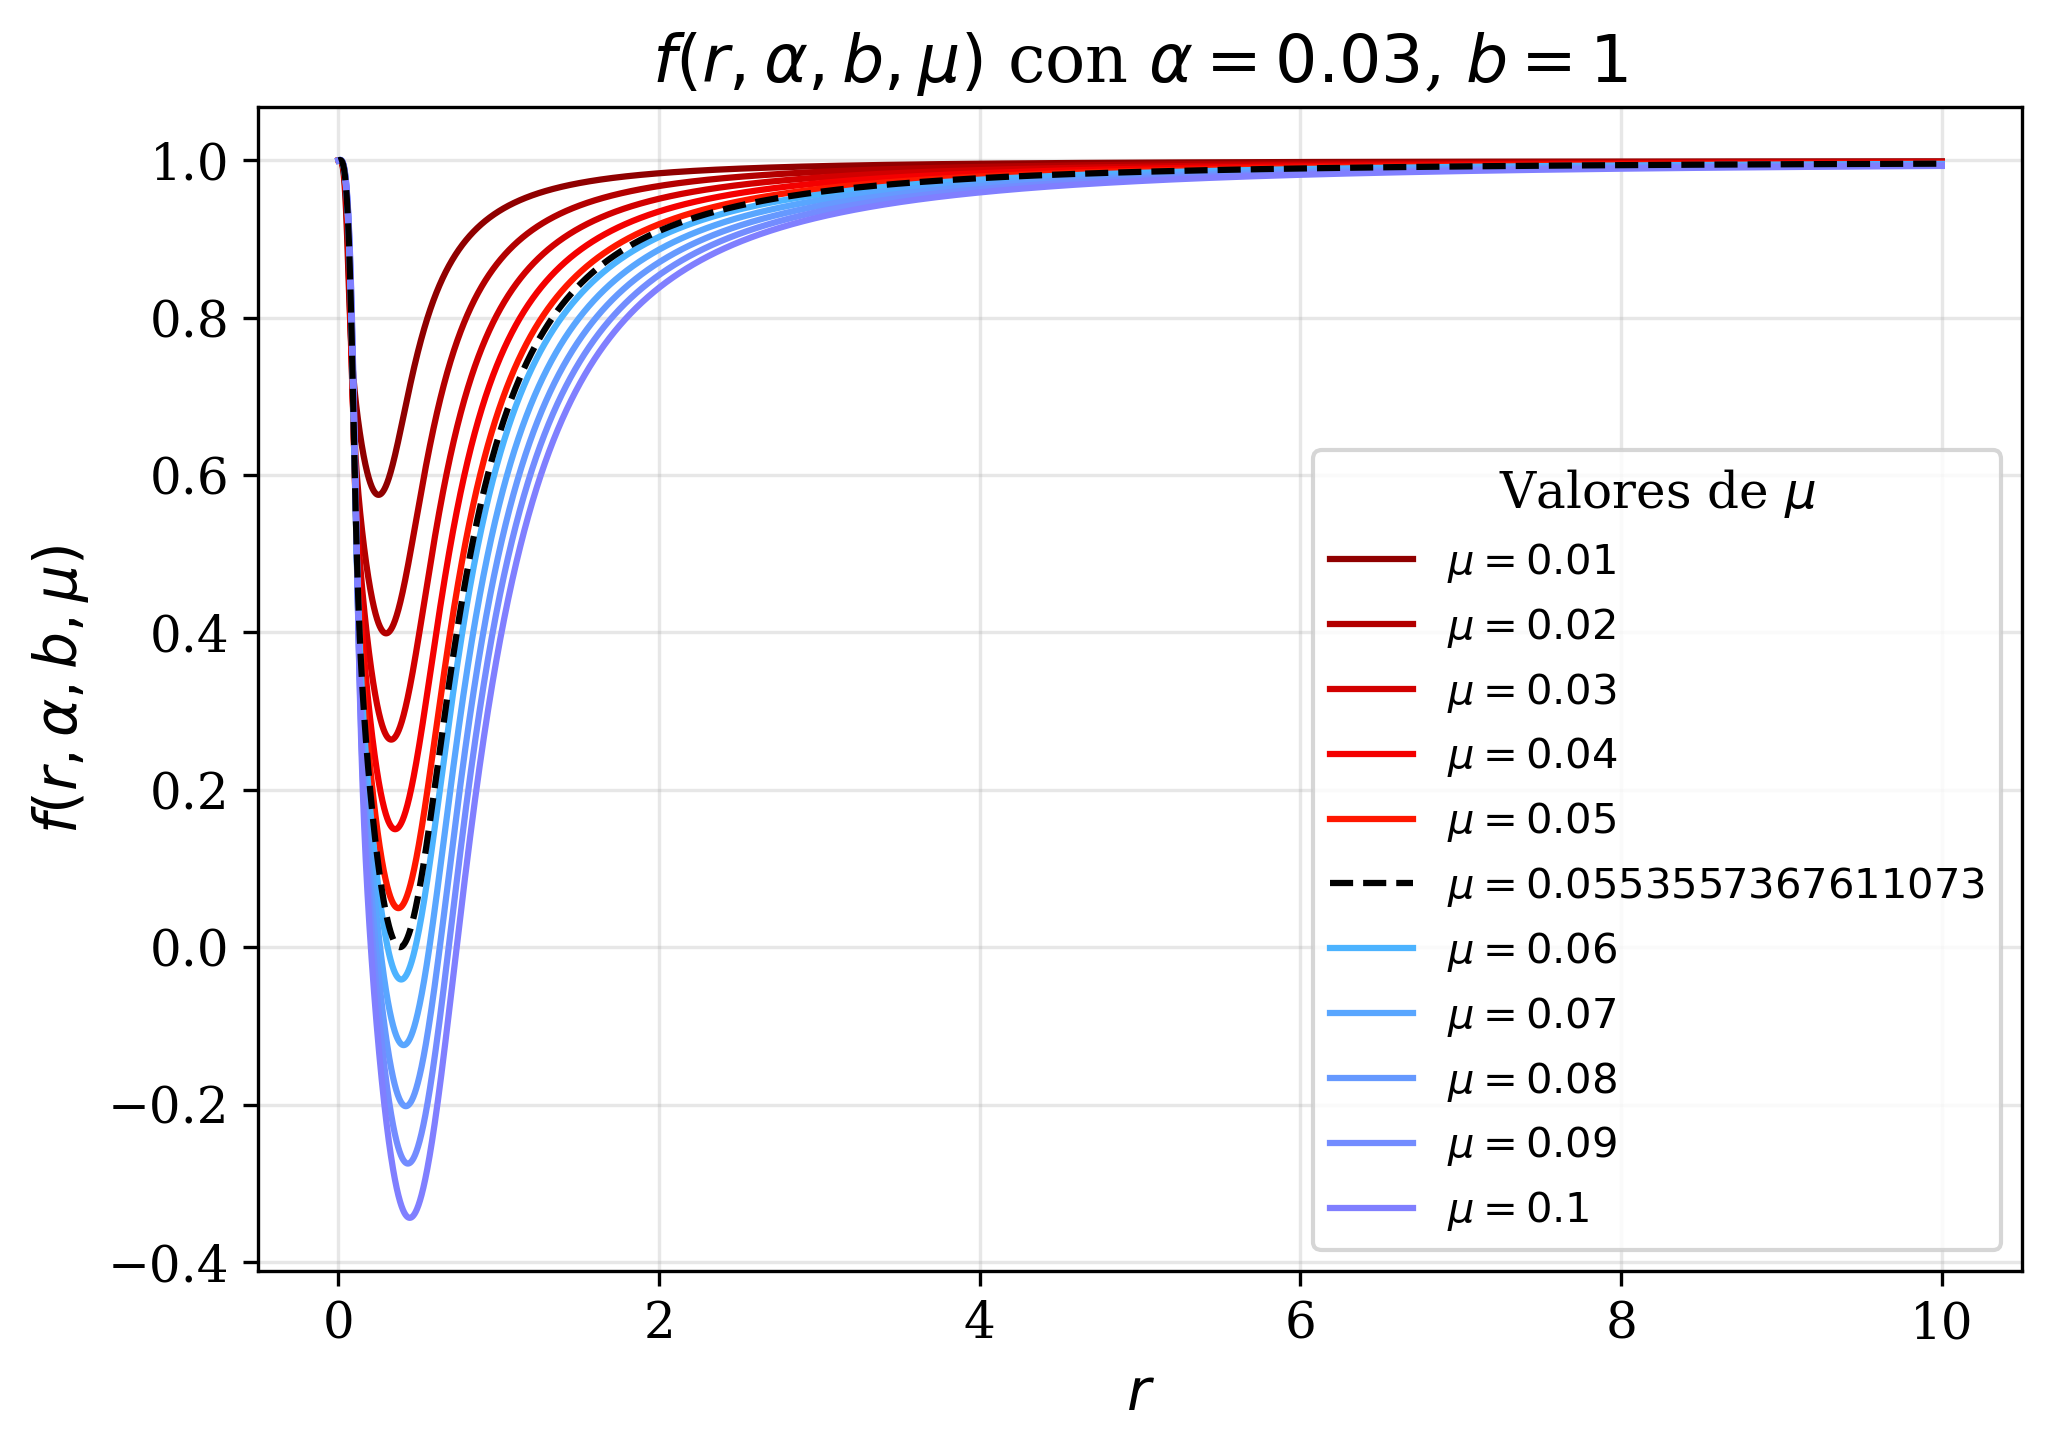

In [15]:
r_vals = np.linspace(0, 10, 10000)
mu_crit = 0.0553557367611073
mu_list = [0.01, 0.02, 0.03, 0.04, 0.05,mu_crit,0.06,0.07,0.08,0.09,0.1]

plt.figure(figsize=(7,5))

mu_low  = [mu for mu in mu_list if mu < mu_crit]
mu_high = [mu for mu in mu_list if mu > mu_crit]

norm_low  = plt.Normalize(min(mu_low), max(mu_low)) if mu_low else None
norm_high = plt.Normalize(min(mu_high), max(mu_high)) if mu_high else None

# Rangos restringidos del colormap
hot_min, hot_max   = 0.2, 0.4   # solo rojos
cool_min, cool_max = 0.3, 0.5   # solo azules

for mu in mu_list:
    if mu < mu_crit:
        t = norm_low(mu)
        color = plt.cm.hot(hot_min + t * (hot_max - hot_min))
        plt.plot(
            r_vals, f(r_vals, mu),
            color=color,
            label=rf"$\mu = {mu}$"
        )

    elif mu > mu_crit:
        t = norm_high(mu)
        color = plt.cm.cool(cool_min + t * (cool_max - cool_min))
        plt.plot(
            r_vals, f(r_vals, mu),
            color=color,
            label=rf"$\mu = {mu}$"
        )

    else:
        plt.plot(
            r_vals, f(r_vals, mu),
            color="black",
            linestyle="--",
            linewidth=1.5,
            zorder=10,
            label=rf"$\mu = {mu}$"
        )

plt.xlabel(r"$r$")
plt.ylabel(r"$f(r,\alpha,b,\mu)$")
plt.title(r"$f(r,\alpha,b,\mu)$ con $\alpha=0.03$, $b=1$")
plt.grid(True, alpha=0.3)
plt.legend(title=r"Valores de $\mu$", frameon=True)
plt.tight_layout()

plt.savefig("Extremal_BlackHole.png", dpi=300, bbox_inches="tight")
plt.show()

# Casos fuera del constraint

In [5]:
def fover1(r):
    return 1+(3*r**2)/2


def fover2(r, alpha, mu):
    term1 = 1 + (r**2)

    A = -27*np.sqrt(3)*mu + np.sqrt(-4*(r**8)*alpha**2 + 2187*(mu**2))

    term2 = ((2**(1/3)) * ((r**10 * alpha)**(1/3))) / (np.sqrt(3) * A**(1/3))

    term3 = (r**(2/3) * (A/alpha)**(1/3)) / (2**(1/3) * np.sqrt(3))

    return term1 + term2 + term3

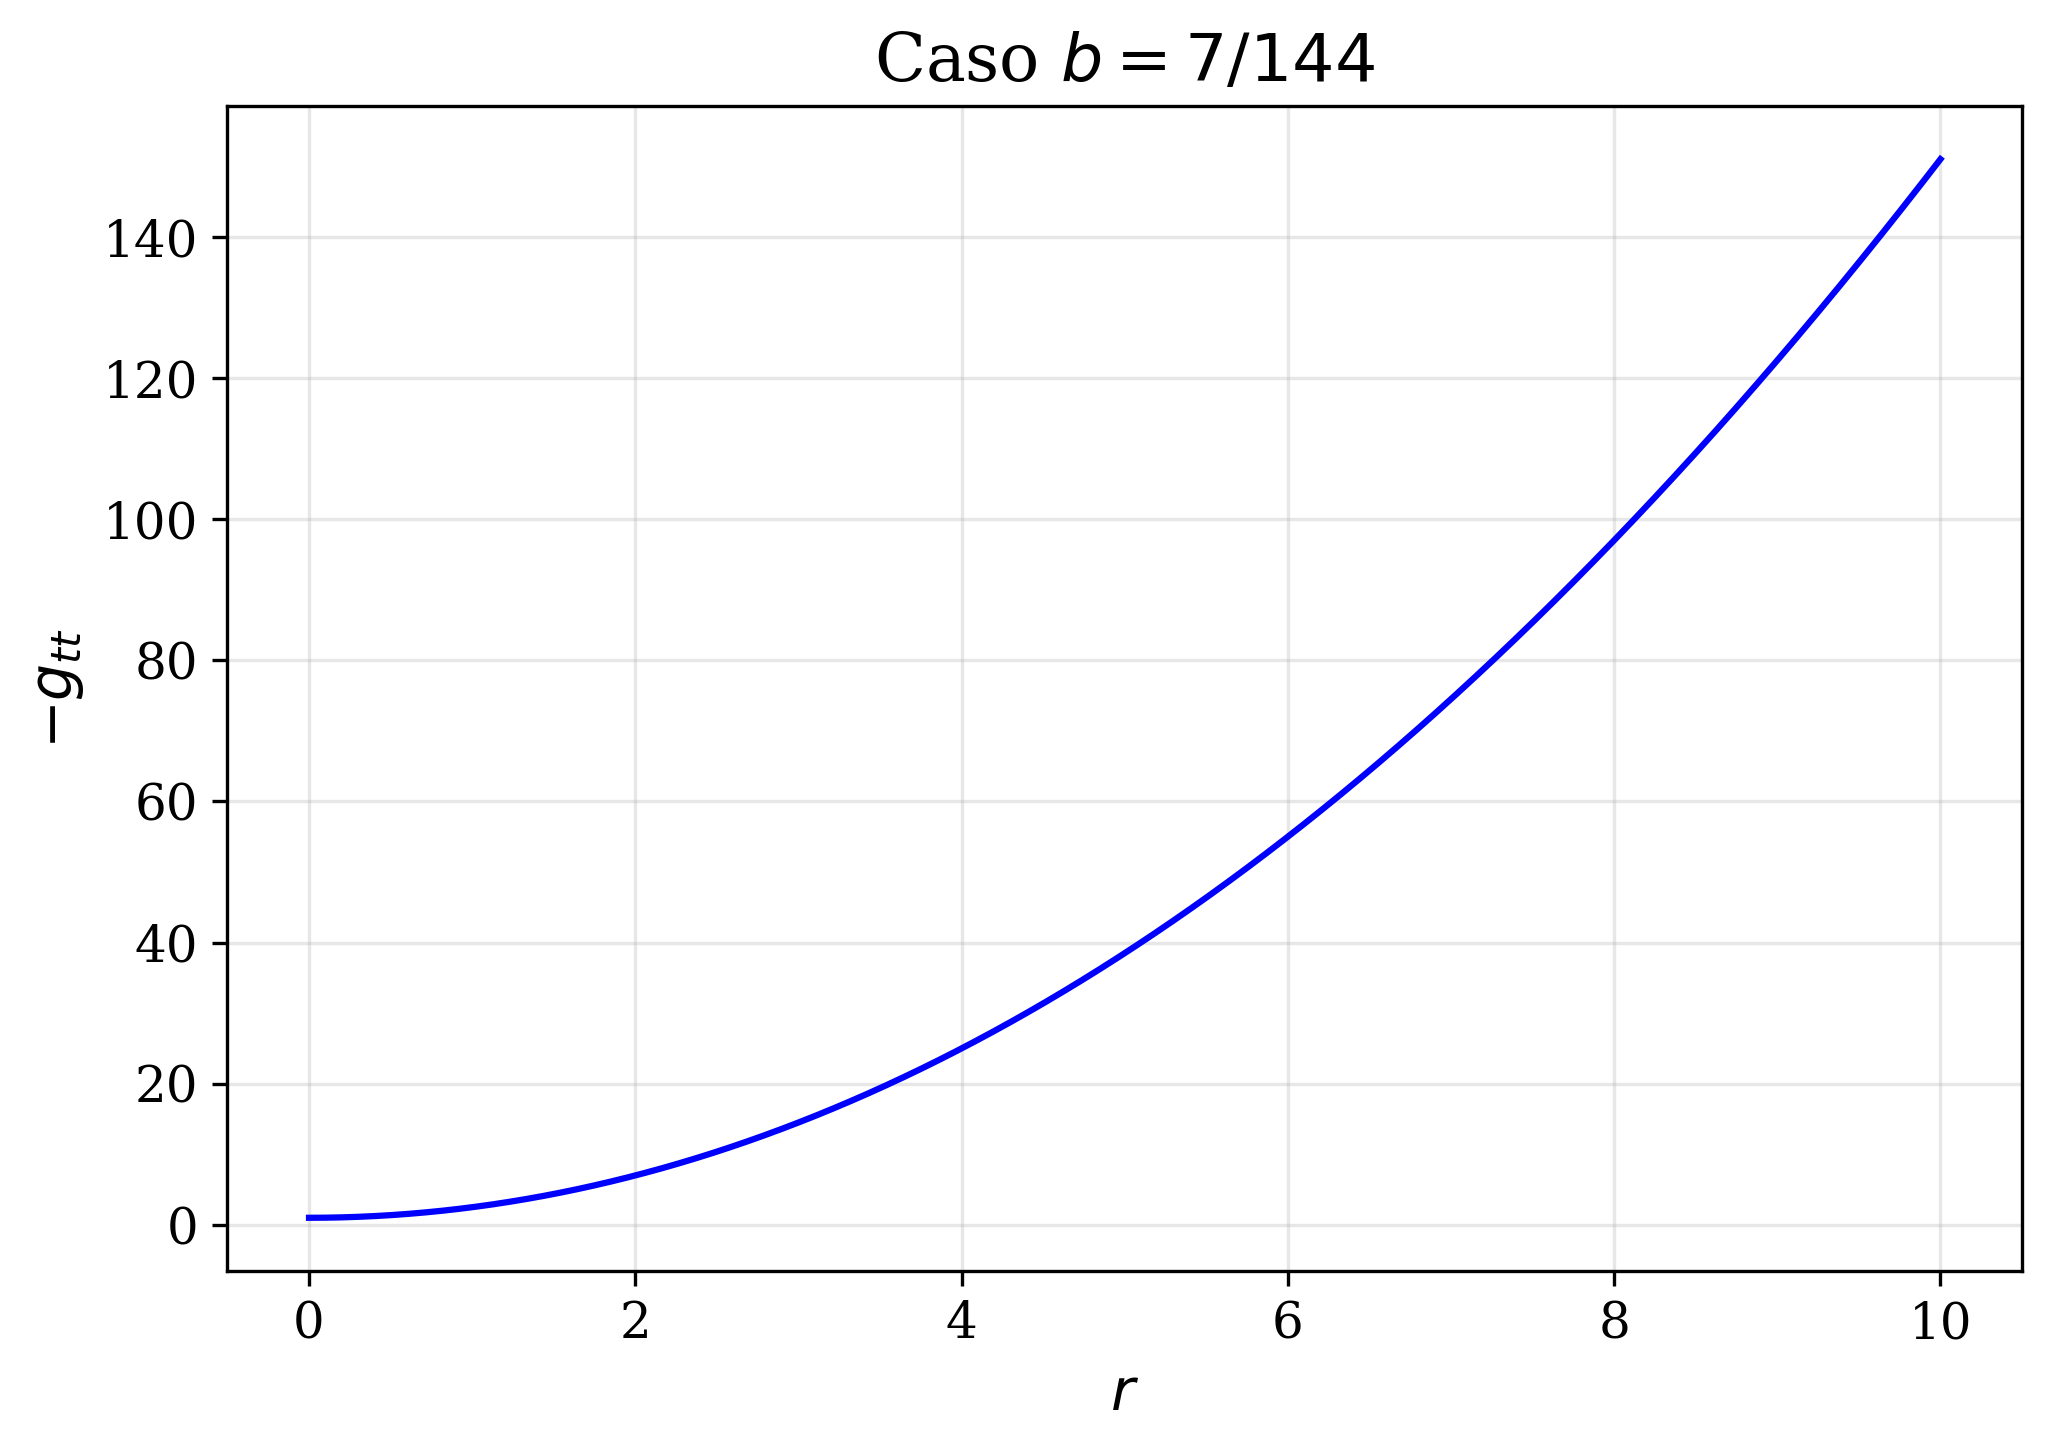

In [11]:
plt.figure(figsize=(7,5))
plt.plot(r_vals, fover1(r_vals), color="blue", label=f"$\\mu = {mu}$")

plt.xlabel("$r$")
plt.ylabel("$-g_{tt}$")
plt.title("Caso $b=7/144$")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("Caso_b7.144.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\375149322.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"
C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\290160017.py:8: RuntimeWarning: invalid value encountered in sqrt
  A = -27*np.sqrt(3)*mu + np.sqrt(-4*(r**8)*alpha**2 + 2187*(mu**2))
C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\290160017.py:10: RuntimeWarning: invalid value encountered in power
  term2 = ((2**(1/3)) * ((r**10 * alpha)**(1/3))) / (np.sqrt(3) * A**(1/3))
C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\290160017.py:10: RuntimeWarning: divide by zero encountered in divide
  term2 = ((2**(1/3)) * ((r**10 * alpha)**(1/3))) / (np.sqrt(3) * A**(1/3))
C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\290160017.py:12: R

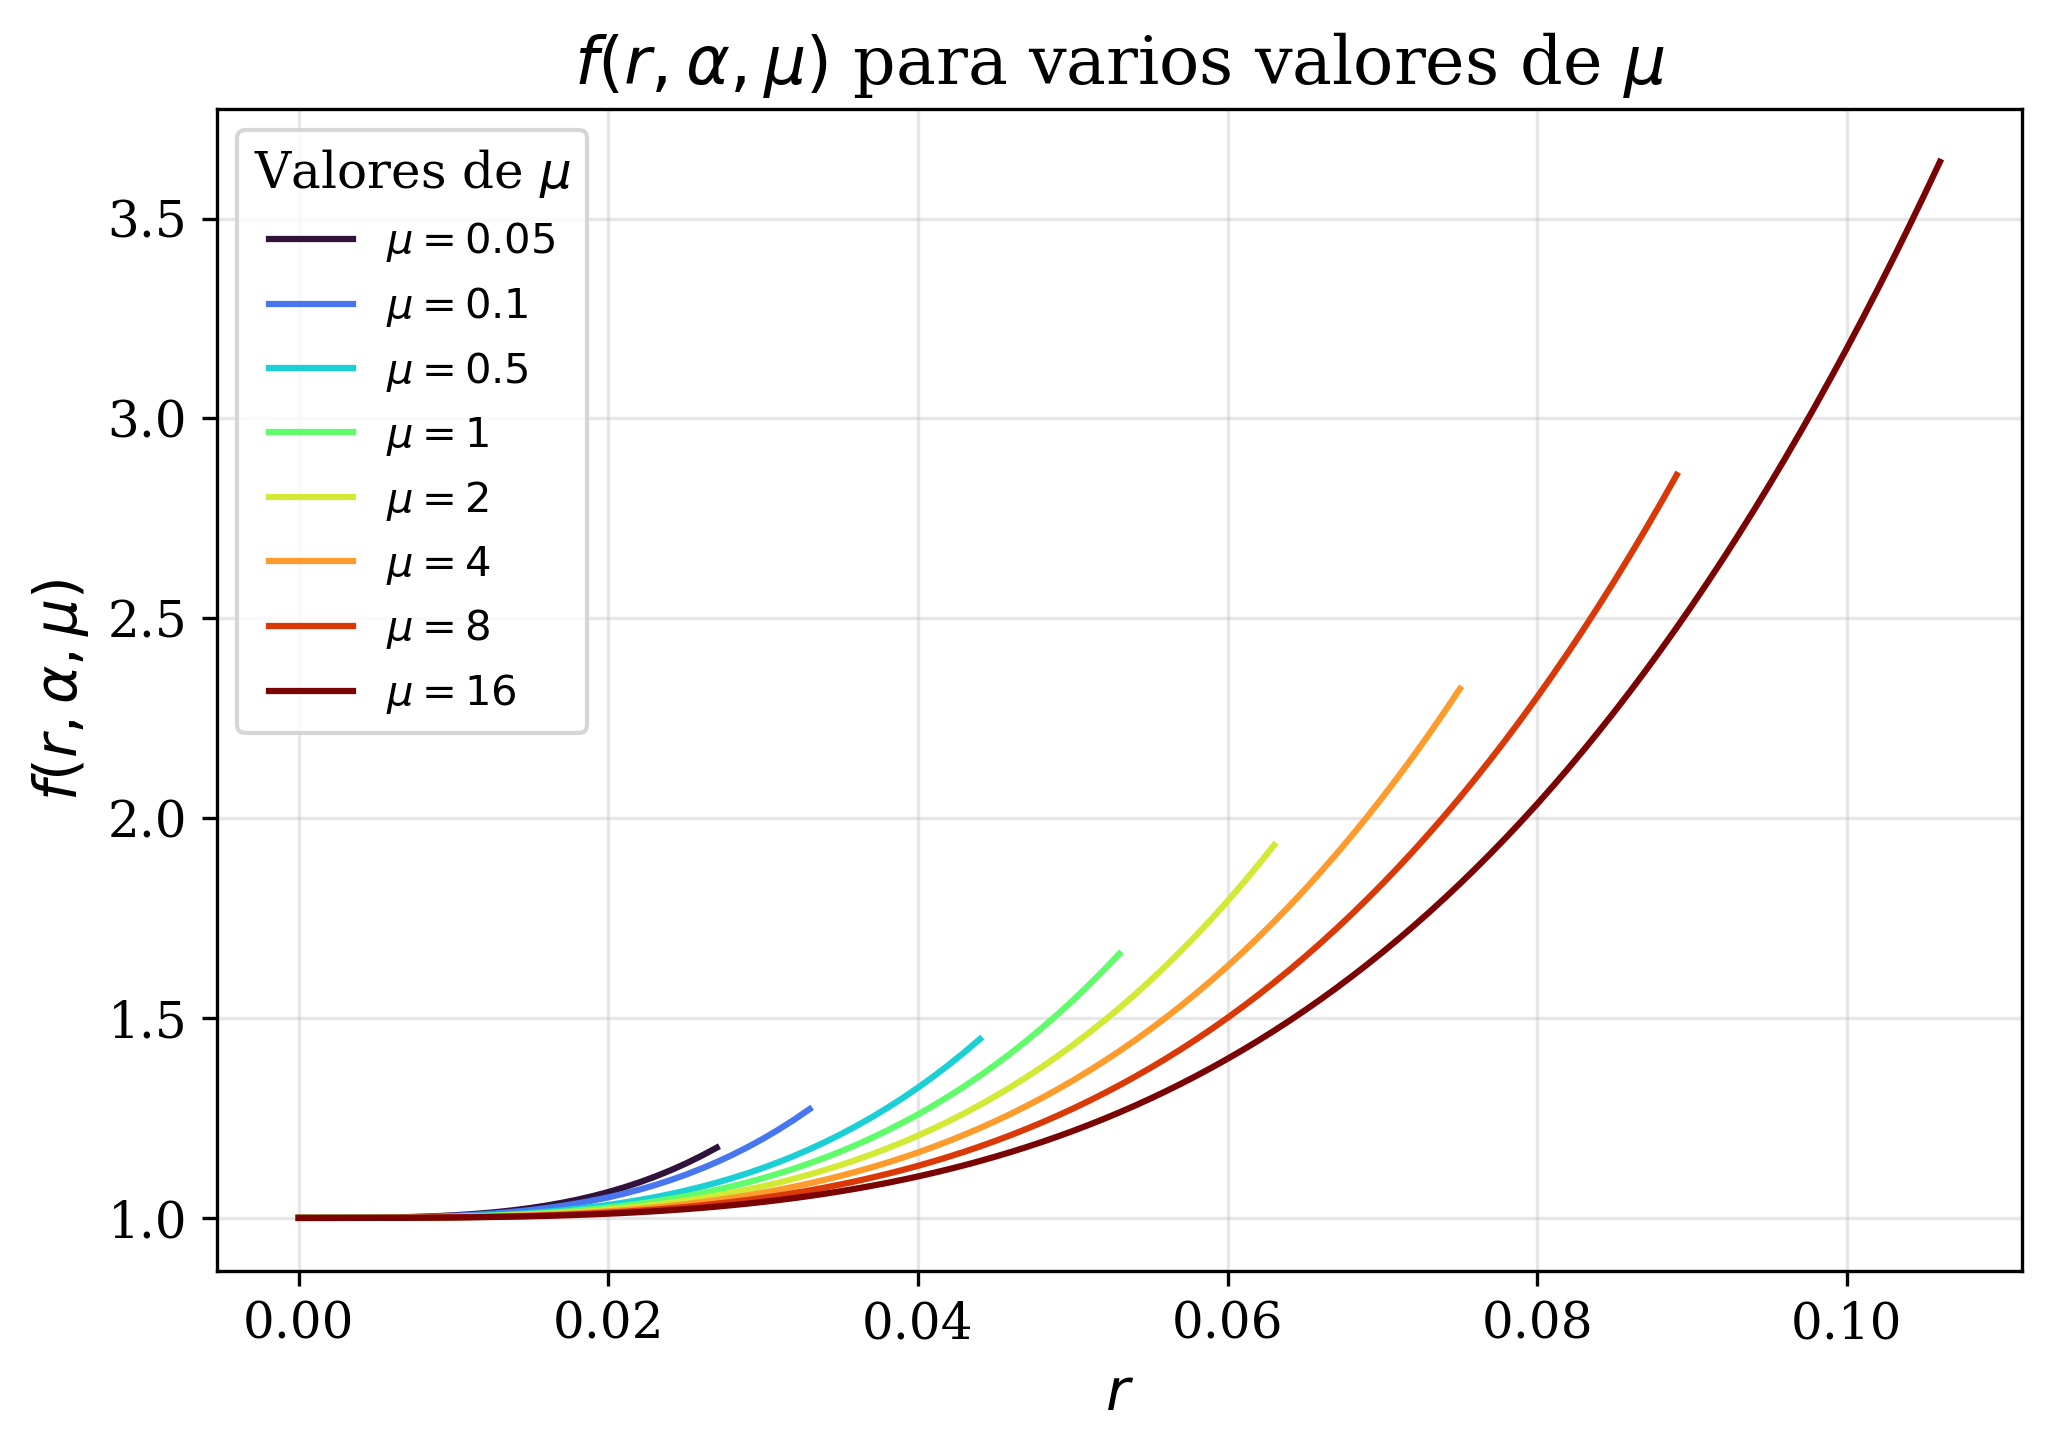

In [52]:
# Colormap profesional tipo arcoiris
cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"

#Para esta gráfica se necesitan valores altos de mu
mu_list=[0.05,0.1,0.5,1,2,4,8,16]
# Graficar
plt.figure(figsize=(7,5))

for i, mu in enumerate(mu_list):
    color = cmap(i / (len(mu_list) - 1))
    plt.plot(r_vals, fover2(r_vals,0.03, mu), color=color, label=f"$\\mu = {mu}$")

plt.xlabel("$r$")
plt.ylabel("$f(r,\\alpha,\\mu)$")
plt.title("$f(r,\\alpha,\\mu)$ para varios valores de $\\mu$")
plt.grid(True, alpha=0.3)
plt.legend(title="Valores de $\\mu$", frameon=True)
plt.tight_layout()
plt.show()

In [54]:
fover2(8,0.03,1)

C:\Users\Danito\AppData\Local\Temp\ipykernel_18692\290160017.py:8: RuntimeWarning: invalid value encountered in sqrt
  A = -27*np.sqrt(3)*mu + np.sqrt(-4*(r**8)*alpha**2 + 2187*(mu**2))


np.float64(nan)